In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [2]:
from sklearn.linear_model import LinearRegression
import mglearn

In [3]:
x,y = mglearn.datasets.load_extended_boston()
#mglearn의 extended_boston데이터를 테스트 데이터로 가져옴.

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=0)
#데이터 분할, 시드 = 0

# 선형회귀

In [5]:
lr = LinearRegression().fit(x_train,y_train)
#모델 선정(선형회귀,기본값), 모델 학습

In [6]:
print("가중치:",lr.coef_)
print("편향",lr.intercept_)
#lr.coef_ = 선형회귀모델의 가중치, lr.intercept _ = 선형회귀모델의 편향
#다중 선형회귀이기 때문에 coef_

가중치: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+01 -1.

In [7]:
print("훈련 세트 점수:{:.2f}".format(lr.score(x_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(x_test,y_test)))
#회귀 모델이므로 model.score()의 기준은 r2_score이다.

훈련 세트 점수:0.95
테스트 세트 점수:0.61


훈련 데이터 셋과 테스트 데이터 셋의 r2_score가 차이가 매우 많이나므로 과대적합이 의심된다.

# Ridge

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train,y_train)
#모델 선정(릿지, 기본값) 및 모델 학습 

In [9]:
print("훈련 세트 점수:{:.2f}".format(ridge.score(x_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(x_test,y_test)))
#회귀 모델이므로 model.score()의 기준은 r2_score이다.

훈련 세트 점수:0.89
테스트 세트 점수:0.75


훈련 세트의 r2_score와 테스트 세트의 r2_score의 차이가 줄어들었다.

이것으로 과대적합이 적어졌다는 것을 알수 있고, 우리가 원하는 점수는 테스트 세트에 대한 성능이기 때문에
이 데이터에서는 일반 선형회귀 모델보다 릿지 모델을 선택하는게 낫다는 것을 알 수 있다. 

In [10]:
ridge10 = Ridge(alpha=10).fit(x_train,y_train)
#모델 선정(릿지, alpha=10) 및 모델 학습 
print("훈련 세트 점수:{:.2f}".format(ridge10.score(x_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(x_test,y_test)))
#회귀 모델이므로 model.score()의 기준은 r2_score이다.
#alpha를 증가시켜 규제를 강하게 줌

훈련 세트 점수:0.79
테스트 세트 점수:0.64


In [11]:
ridge01 = Ridge(alpha=0.1).fit(x_train,y_train)
#모델 선정(릿지, alpha=0.1) 및 모델 학습 
print("훈련 세트 점수:{:.2f}".format(ridge01.score(x_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge01.score(x_test,y_test)))
#회귀 모델이므로 model.score()의 기준은 r2_score이다.
#alpha를 줄여서 규제를 약하게 줌

훈련 세트 점수:0.93
테스트 세트 점수:0.77


### ridge 모델의 alpha값에 따라 가중치 값 비교하기

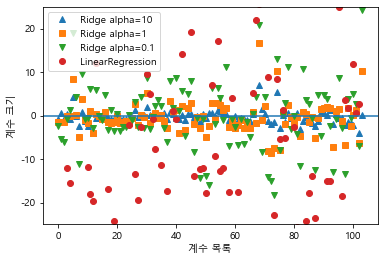

In [12]:
#시각화
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')
plt.plot(lr.coef_,'o',label='LinearRegression')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()
plt.show()

- 이 그림의 x축은 coef_의 원소를 위치대로 나열한 것이고 y축은 각 계수의 수치를 나타낸다.
- 규제의 효과를 이해하는 또 다른 방법은 alpha값을 고정하고 훈련데이터의 크리를 변화시켜 보는 것이 있다.
- 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습 곡선(learning curve)이라고 한다.

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

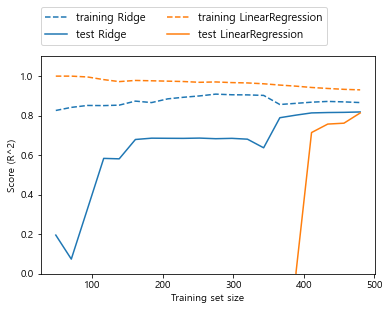

In [13]:
mglearn.plots.plot_ridge_n_samples()

이 그래프는 보스턴 주택가격 데이터셋에 대한 리지회귀와 선형회귀의 학습곡선이다

- 여기서 배울수 있는 것은 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형회귀의 성능이 비슷해 질 수 있다는 것이다.

## note

Ridge 클래스의 solver 매개 변수에서는 여러가지 알고리즘을 지정할 수 있다. 

기본값은 'auto'로 훈련 데이터가 희소 행렬이면 켤레기울기법인 'sparse_cg'를 사용하고 그렇지 않으면 해석적으로 문제의 해를 구하는 방법인 'cholesky'를 사용한다. 

계수 값을 양수로 강제하기 위해 positive 매개변수를 TRUE로 지정하면 L-BFGS-B 알고리즘인 'lbfgs'가 사용된다. 이 외에도 확률적 평균 경사 하강법인 'sag'와 sag의 개선 버전인 'saga'를 사용 가능합니다.

이 두 방식은 특성과 샘플이 많은 경우 종종 다른 알고리즘보다 속도가 빠릅니다,

'sparse_cg'의 경우 반복 횟수인 max_iter 매개변수의 기본 값은 샘플 개수의 10배로 지정됩니다.
'sag','saga'의 경우는 1000이고 'lbfgs'의 경우에는 15,000입니다.

실제 반복횟수는 Ridge 클래스 객체의 n_iter_ 속성에서 확인이 가능합니다.

# Lasso

In [14]:
from sklearn.linear_model import Lasso

In [15]:
lasso = Lasso().fit(x_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso.score(x_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(x_test,y_test)))
print('사용한 특성의 개수:',np.sum(lasso.coef_!=0))
#lasso모델의 가중치가 0이 아닌 특성의 갯수 합.
#회귀 모델이므로 model.score()의 기준은 r2_score이다.

훈련 세트 점수:0.29
테스트 세트 점수:0.21
사용한 특성의 개수: 4


In [16]:
#max_iter 값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생
lasso001 = Lasso(alpha=0.01,max_iter=50000).fit(x_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso001.score(x_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso001.score(x_test,y_test)))
print('사용한 특성의 개수:',np.sum(lasso.coef_!=0))
#lasso모델의 가중치가 0이 아닌 특성의 갯수 합.
#회귀 모델이므로 model.score()의 기준은 r2_score이다.

훈련 세트 점수:0.90
테스트 세트 점수:0.77
사용한 특성의 개수: 4


In [17]:
#max_iter 값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생
lasso00001 = Lasso(alpha=0.0001,max_iter=50000).fit(x_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso00001.score(x_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso00001.score(x_test,y_test)))
print('사용한 특성의 개수:',np.sum(lasso.coef_!=0))
#lasso모델의 가중치가 0이 아닌 특성의 갯수 합.
#회귀 모델이므로 model.score()의 기준은 r2_score이다.

훈련 세트 점수:0.95
테스트 세트 점수:0.64
사용한 특성의 개수: 4


### lasso 모델의 alpha값에 따라 가중치 값 비교하기

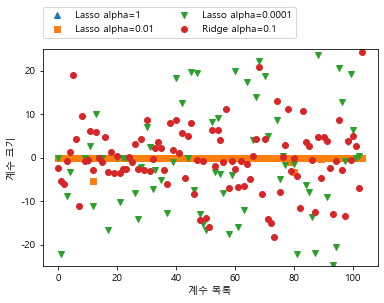

In [18]:
#시각화
plt.plot(lasso.coef_,'^',label='Lasso alpha=1')
plt.plot(lasso.coef_,'s',label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_,'v',label='Lasso alpha=0.0001')
plt.plot(ridge01.coef_,'o',label='Ridge alpha=0.1')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.ylim(-25,25)
plt.legend(ncol=2,loc=(0,1.05))
plt.show()

## note

LinearRegression,Ridge,Lasso,ElasticNet(L1규제와,L2규제의 패널티를 결합)등의 선형 모델에서 제공하는 normalize 매개변수를 True로 지정하면 훈련 데이터에서 평균을 빼고 L2 노름으로 나누어 정규화합니다.

하지만 fit_intercept 매개변수가 기본값 True이면 normalize 매개변수는 아무런 영향을 미치지 않습니다.
normalize 매개 변수는 1.0버전에서 삭제되며 훈련 데이터를 정규화하려면 StandardScaler를 이용할 수 잇습니다.

# QuantileRegressor

scikit-learn 버전에서 하나의 예측값이 아닌 예측의 백분위 간격을 구하는 데 사용할 수 있는 QuantileRegressor 클래스가 추가되었습니다.

quantile 매개변수에 예측하려는 백분위수를 ~ 사이로 지정합니다. 기본값은 0.5로 중간값을 예측합니다.

Lasso 모델과 비슷하게 alpha 매개변수로 L1 규제를조정합니다. alpha 매개변수의 기본값은 1.0이고 커질수록 규제가 강해져 과소적합된 모델을 만듭니다

### wave 데이터셋을 사용해 훈련세트에서 학습한 90%,50%,10% 백분위 범위를 테스트 세트와 함꼐 출력하기

In [19]:
from sklearn.linear_model import QuantileRegressor

In [20]:
x,y = mglearn.datasets.make_wave(n_samples=60)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)
# x,y = wave 데이터 셋 , 42번 시드, train,test 데이터셋으로 분할

In [21]:
pred_up=QuantileRegressor(quantile=0.9,alpha=0.01).fit(x_train,y_train).predict(x_test)
#모델선정 (90%),학습,예측

In [22]:
pred_med=QuantileRegressor(quantile=0.5,alpha=0.01).fit(x_train,y_train).predict(x_test)
#모델선정(50%),학습,예측

In [23]:
pred_low=QuantileRegressor(quantile=0.1,alpha=0.01).fit(x_train,y_train).predict(x_test)
#모델선정(10%),학습,예측

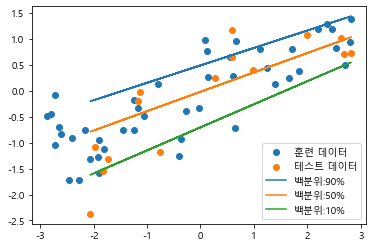

In [24]:
#시각화
plt.scatter(x_train,y_train,label='훈련 데이터')
plt.scatter(x_test,y_test,label='테스트 데이터')
plt.plot(x_test,pred_up,label="백분위:90%")
plt.plot(x_test,pred_med,label="백분위:50%")
plt.plot(x_test,pred_low,label="백분위:10%")
plt.legend()
plt.show()